# 🤖 **Predicción de Fraude Crediticio con AutoML y Optimización Estratégica del Umbral**

El fraude crediticio es un problema frecuente que **genera importantes pérdidas económicas** para las entidades financieras, especialmente los bancos.

Detectar estos fraudes en créditos es clave para proteger el capital y mantener la confianza de los clientes.

En este proyecto desarrollamos una solución basada en **AutoML** y **Programación Genética** 🧬, con un enfoque estratégico centrado en la **lógica del negocio** y el **impacto económico real**.

####🎯 Objetivos principales:

1️⃣ **Optimizar el umbral de decisión en función de los costos y beneficios** reales del banco, en lugar de depender únicamente de métricas estándar.

2️⃣ **Automatizar la detección de fraudes**, identificando patrones complejos que podrían pasar desapercibidos con métodos tradicionales.

3️⃣ **Diseñar una herramienta personalizada**, que comprenda las necesidades especificas del cliente, para que en base a eso le ayude en la toma de decisiones, mejorando la rentabilidad del negocio.

####🚀 ¿Qué hace especial a este modelo?
- 🔧 **Enfoque personalizado:**

 La solución fue diseñada específicamente para el contexto y necesidades del banco, evitando modelos genéricos.

- 💡 **Visión económica:**

 El modelo fue ajustado para maximizar la rentabilidad, proteger los activos financieros y reducir el riesgo de pérdidas económicas.

- 🌐 **Alta capacidad de adaptación:**

 Puede implementarse fácilmente en otros entornos o ajustarse ante cambios estratégicos del negocio.

### Este proyecto demuestra cómo **un uso inteligente y estratégico del AutoML** puede generar modelos confiables y alineados al negocio, con **impacto económico directo y capacidad real de proteger los intereses de las instituciones financieras**.









In [ ]:
# Importamos las Herramientas necesarias para trabajar
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tpot import TPOTClassifier
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from google.colab import drive
from tpot import TPOTClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score, roc_curve, auc
import seaborn as sns
import numpy as np


In [ ]:
# Conectamos con Google Drive, debiudo a que ahí tenemos los datos con los que vamos a trabajar
drive.mount('/content/drive')


Mounted at /content/drive


# **🔍 Primera Parte: Preprocesamiento del Dataset**

Antes de construir un modelo de predicción, **es esencial preparar correctamente los datos**.

⚙️ Esta fase garantiza que la información esté limpia, ordenada y en el formato adecuado, lo que facilita un entrenamiento más eficaz y confiable del modelo.

###📊 **Realizaremos un paso a paso estratégico para asegurar la calidad del dataset y alinear su preparación con los objetivos del negocio**.


## 📂 **Importación de Datos y Verificación de Valores Nulos**

El primer paso consiste en cargar el conjunto de datos y revisar si contiene valores faltantes o nulos.

⚠️ Estos valores pueden surgir por errores en la recolección o por datos incompletos, si no se manejan adecuadamente, **pueden afectar el rendimiento del modelo** al distorsionar relaciones importantes entre las variables.

####🔎 En esta etapa se realizan tres acciones clave:

1️⃣ **Cargar el dataset para comenzar con el análisis exploratorio**.

2️⃣ **Identificar los valores nulos en cada columna**.

3️⃣ **Aplicar el tratamiento más adecuado:** eliminación, imputación o técnicas específicas según el contexto.

###✅ Esta verificación garantiza que los datos estén listos para el entrenamiento, mejorando la calidad, estabilidad y precisión del modelo.



In [ ]:
# Importamos la base de datos desde Google Drive
df = pd.read_csv('/content/drive/MyDrive/Bases de Datos/german_credit_data.csv')

In [ ]:
# Mostramos las primeras filas de la Base de Datos
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


### **📌 Variables Independientes y Variable Dependiente**

En esta etapa analizamos las primeras filas del dataset para entender qué tipo de información contiene y cómo se estructura.

####🔍 Objetivo:
Identificar correctamente las variables independientes (características del cliente) y la variable dependiente (etiqueta objetivo).

####✅ **Variables Independientes:**

Son todas las columnas excepto "Risk", estas variables contienen datos relevantes y específicos de cada cliente, como:

- Edad

- Sexo

- Ocupación

- Estado de cuenta

- Plazo en meses

- Entre otros

🧠 Estos datos permiten detectar patrones que el modelo puede aprender, **para así identificar con mayor precisión cuáles clientes representan un mayor riesgo de fraude** y cuáles no.

####🎯 **Variable Dependiente:**

Es la columna "Risk", esta variable representa la clasificación del cliente:

- Si fue considerado riesgoso de fraude.

- O si no representa un riesgo.

###🔁 **En función de los patrones encontrados en las variables independientes, el modelo aprenderá a predecir esta variable como "fraude" o "no fraude"**.



In [ ]:
# Definimos la Variable dependiente y las independientes
X = df.drop('Risk', axis=1)  # Varibles que presentan patrones de fraude, para realizar la predicción

Y = df['Risk']               # Variable que se clasificará como Fraude o No Fraude

## 📂**Verificación de Valores Nulos dentro de los Datos**

In [ ]:
# Verificamos
df.isnull().sum()

,0
Unnamed: 0,0
Age,0
Sex,0
Job,0
Housing,0
Saving accounts,183
Checking account,394
Credit amount,0
Duration,0
Purpose,0


### **📉 Variables con Valores Faltantes**

Durante el análisis del dataset identificamos dos variables importantes con datos faltantes.

Estas variables **están relacionadas con la salud financiera del cliente** y **podrían influir directamente en la predicción del riesgo de fraude**.

####1️⃣ Saving accounts:

- 🔹 **Representa el tipo de cuenta de ahorros** que posee el cliente.

- 📉 **Tiene 183 valores faltantes**.

📌 Esta información es clave para entender la capacidad de ahorro y estabilidad financiera del cliente, sin embargo, no todos los registros la incluyen.

####2️⃣ Checking account:

- 🔹 **Indica el tipo de cuenta** corriente del cliente.

- 📉 **Contiene 394 valores faltantes**.

📌 También es un indicador importante de la situación económica, pero **muchos clientes no han reportado esta información**.

####🧩 ¿Qué hacemos con los valores faltantes?
En este punto **evaluamos las mejores estrategias para tratarlos**, dependiendo del impacto en el análisis:

- **Imputación**: Reemplazar los valores faltantes con categorías como "desconocido" o con la moda que es el valor que más veces se repite.

- **Eliminación**: Quitar los registros si el número de faltantes afecta negativamente la calidad del modelo.

###✅ Esta decisión se toma considerando el equilibrio entre mantener la mayor cantidad de información posible y asegurar la calidad de los datos para el modelo.



## 🧩 **Relleno de Valores Faltantes con “Desconocido”**

En esta etapa del preprocesamiento, decidimos rellenar los valores faltantes de las columnas “Saving accounts” y “Checking account” con la categoría “Desconocido”.

####🔍 ¿Por qué tomamos esta decisión?

Esta estrategia es útil cuando los valores ausentes no necesariamente se deben a errores, sino a que **algunos clientes simplemente no proporcionaron esa información**.

En lugar de eliminar estos registros o imputar con valores promedio, optamos por preservar la diversidad de casos y **representar explícitamente la ausencia de datos**.

####✅ Al incorporar “Desconocido” como una categoría válida:

- Mantenemos el registro de todos los clientes, **sin perder información valiosa**.

- Le damos al modelo la oportunidad de aprender **si la falta de información también puede ser un indicio de riesgo**.

- **Evitamos introducir suposiciones** sobre estos datos al forzar una imputación sin mucho sentido.

###📌 **Esta decisión mejora la robustez del modelo y permite una mejor generalización frente a casos reales, donde los datos incompletos son comunes**.

In [ ]:
# Rellenamos las Variables "Saving accounts" y "Checking account"
df['Saving accounts'].fillna('ND',inplace=True)
df['Checking account'].fillna('ND',inplace=True)


<ipython-input-6-5f0683a716ba>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Saving accounts'].fillna('ND',inplace=True)
<ipython-input-6-5f0683a716ba>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

## **🔄 Transformación de las Variables a un Formato Adecuado**

Antes de entrenar cualquier modelo de **Machine Learning**, es fundamental asegurarse de que todas las variables estén en un formato que el algoritmo pueda interpretar correctamente.

###🛠️ Para lograrlo, **aplicamos tres técnicas clave de transformación, adaptadas al tipo de datos presentes en el dataset**:

###**🔢 1 - Conversión de Palabras a Números (Variables Binarias)**

Algunas variables del dataset contienen valores en formato de texto, como el sexo del cliente **“hombre” o “mujer”**, o el riesgo de fraude **“bueno” o “malo”**.

📉 Los modelos matemáticos no pueden procesar palabras directamente, por lo que **es necesario transformarlas en números**, esta técnica se llama **codificación binaria** y permite representar categorías con solo dos posibles valores.

####✔️ Ejemplos prácticos:

- **"hombre"** se transforma en 0 y **"mujer"** en 1.

- **"bueno"** (sin riesgo) se transforma en 0 y **"malo"** (riesgoso) en 1

###✅ Gracias a esta conversión, **el modelo puede procesar correctamente estas variables durante el entrenamiento y realizar predicciones más precisas**.

In [ ]:
# Convertimos las Variables Binarias:
df['Sex'] = df['Sex'].map({'male':0,'female':1})
df['Risk'] = df['Risk'].map({'good':0,'bad':1})

### 🏠 **2 - Separación de Categorías (Variables Nominales)**

En algunas columnas, como el tipo de vivienda o el propósito del crédito, **las opciones no siguen un orden específico**, por ejemplo: "auto", "educación", "mobiliario", etc.

#### 🔍 Estas categorías se les conoce como **nominales**:

No se pueden representar con números simples como 1, 2 o 3, **porque eso implicaría un orden que no existe**.

####✅ Para resolverlo:

**Aplicamos una técnica llamada One-Hot Encoding**, que consiste en crear una nueva columna para cada categoría:

- Si un cliente tiene un crédito para "educación", **la columna "educación" tendrá un 1 y las demás un 0**.

 Así, cada fila **representa claramente a qué categoría pertenece el cliente**, sin causar confusiones al modelo.

###📊 **Esta codificación ayuda a que el modelo entienda mejor las diferencias entre categorías sin generar relaciones erróneas.**











In [ ]:
# Convertimos las variables Nominales a Dummy:
df = pd.get_dummies(df,columns=['Housing','Purpose'])


###**📈 3 - Asignar un Orden Lógico (Variables Ordinales)**

En algunas columnas, como las de niveles de ahorro o cuentas bancarias, **sí existe un orden natural** entre las categorías.

Por ejemplo, **tener "pocos ahorros" no es lo mismo que tener "muchos ahorros"**.

####🧠 Para que el modelo entienda ese orden, asignamos un número a cada categoría de forma ascendente:

- **"sin datos"** → 0

- **"pocos ahorros"** → 1

- **"ahorros moderados"** → 2

- **"bastantes ahorros"** → 3

- **"muchos ahorros"** → 4

###🔄 De esta forma, el modelo no solo reconoce las diferencias entre categorías, sino también el nivel de cada una, lo que le **permite tomar mejores decisiones**.

In [ ]:
# Verificamos el tipo de Variable Categorica, verificando los valores unicos haciendo uso de ".unique" en un bucle for
for col in df.columns:
  if df[col].dtypes == 'object':
    print(f'Valores unicos en cada columna: {col}: {df[col].unique()}')


Valores unicos en cada columna: Saving accounts: ['ND' 'little' 'quite rich' 'rich' 'moderate']
Valores unicos en cada columna: Checking account: ['little' 'moderate' 'ND' 'rich']


In [ ]:
# Convertimos las Variables Ordinales, haciendo uso de mapeo segun el orden jerarquico:
mapeo_saving_accounts = {'ND':0,'little':1,'moderate':2,'quite rich':3,'rich':4}
mapeo_checking_account = {'ND':0,'little':1,'moderate':2,'rich':3}

# Aplicamos el mapeo usando ".map"
df['Saving accounts'] = df['Saving accounts'].map(mapeo_saving_accounts)
df['Checking account'] = df['Checking account'].map(mapeo_checking_account)



# 📊 **Segunda Parte: División de los Datos en Entrenamiento y Prueba**

En este paso, dividimos nuestro dataset en dos partes clave:

1️⃣ **Datos de entrenamiento**: Son los datos que el modelo usará para aprender patrones relacionados con el fraude.

2️⃣ **Datos de prueba**: Son datos que el modelo nunca ha visto antes, y sirven para medir qué tan bien aprendió a detectar fraudes en nuevos casos.

####🔴 El reto: el fraude es poco común
En la mayoría de los casos, **los clientes no cometen fraude**, por lo tanto, hay muchísimos ejemplos de “No Fraude” y muy pocos de “Fraude”.

Esto genera un problema conocido como **desbalance de clases**.

####📉 ¿Por qué es un problema?
Si el modelo no lo maneja correctamente, podría **"aprender"** a decir siempre **que no hay fraude**, y aunque acierte la mayoría de las veces, fallaría justo en lo más importante: **detectar los fraudes reales**.

####🛠️ ¿Cómo lo solucionamos?

Usamos una técnica especial llamada **StratifiedShuffleSplit**, que:

- ✔️ **Mantiene la misma proporción de fraudes y no fraudes** en los conjuntos de entrenamiento y prueba.

- ✔️ Mezcla aleatoriamente los datos, **evitando patrones no deseados**.

####📌 En resumen:

###El modelo se entrena con una representación equilibrada del mundo real, **mejorando su capacidad de detectar fraudes**.



In [ ]:
# Creamos la instancia de StratifiedShuffleSplit
divisor_estratificado = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=99)

In [ ]:
# Aplicamos la instancia de StratifiedShuffleSplit para hacer la división estratificada
for entrenamiento_index, evaluacion_index in divisor_estratificado.split(X, Y):

    X_entrenamiento = X.iloc[entrenamiento_index]  # 80% de los datos originales (sin la columna "Risk")
    X_evaluacion = X.iloc[evaluacion_index]        # 20% de los datos originales (sin la columna "Risk")

    Y_entrenamiento = Y.iloc[entrenamiento_index]  # 80% de las etiquetas ("Risk")
    Y_evaluacion = Y.iloc[evaluacion_index]        # 20% de las etiquetas ("Risk")


# **📐 Tercera Parte: Escalado de las Variables Numéricas**

Luego de dividir los datos en entrenamiento y prueba, **es esencial preparar las variables numéricas** para que el modelo trabaje de forma más **eficiente y precisa**.

⚙️ En esta etapa, aplicamos el escalado de variables, es decir, **llevamos todos los valores numéricos a una misma escala**, evitando que una variable con números muy grandes influya más que las demás en el proceso de aprendizaje.

####📊 No todas las variables numéricas se comportan igual:

- **Algunas siguen una distribución normal**.

- **Otras tienen valores atípicos o rangos muy diferentes**.

#### Por eso, usamos una estrategia inteligente y adaptada a cada caso:

🔹 **StandardScaler**: para variables que siguen una distribución normal.

🔸 **MinMaxScaler**: para variables con valores extremos o distribuciones no normales.

####🎯 Esta transformación cuidadosa permite que el modelo:

- ✅ **Aprenda los patrones de forma más precisa**.

- ✅ **Trabaje de manera equilibrada** con todas las variables.

- ✅ **Tenga un mejor rendimiento final**.

### Para eso, haremos uso de una técnica eficiente, que nos ayudará a decidir que escala le vamos a aplicar a cada variable:

## **📊 Análisis de la Distribución de las Variables**

Para tomar decisiones informadas sobre el tipo de escalado más adecuado, **implementamos una función que genera histogramas de cada variable**.

📈 Estos gráficos nos permiten visualizar de forma rápida y ordenada cómo se distribuyen los datos en cada columna numérica.

####🔍 Gracias a este análisis visual, **podemos identificar con mayor precisión**:

- 🔹 **Qué variables tienen una distribución normal** y por tanto usar StandardScaler.

- 🔸 **Qué variables presentan valores atípicos** o distribuciones irregulares y aplicar MinMaxScaler.

###✅ Esta selección personalizada del tipo de escalado **permite adaptar el procesamiento de los datos a sus características reales**, y así decidir de manera más acertada.

In [ ]:
# Creamos la función para crear los gráficos o histogramas de las Variables Númericas
def crear_histograma(df, columna):
    plt.figure(figsize=(8, 6),dpi=200)
    plt.hist(df[columna], bins=30, edgecolor='k')
    plt.title(f'Histograma de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()

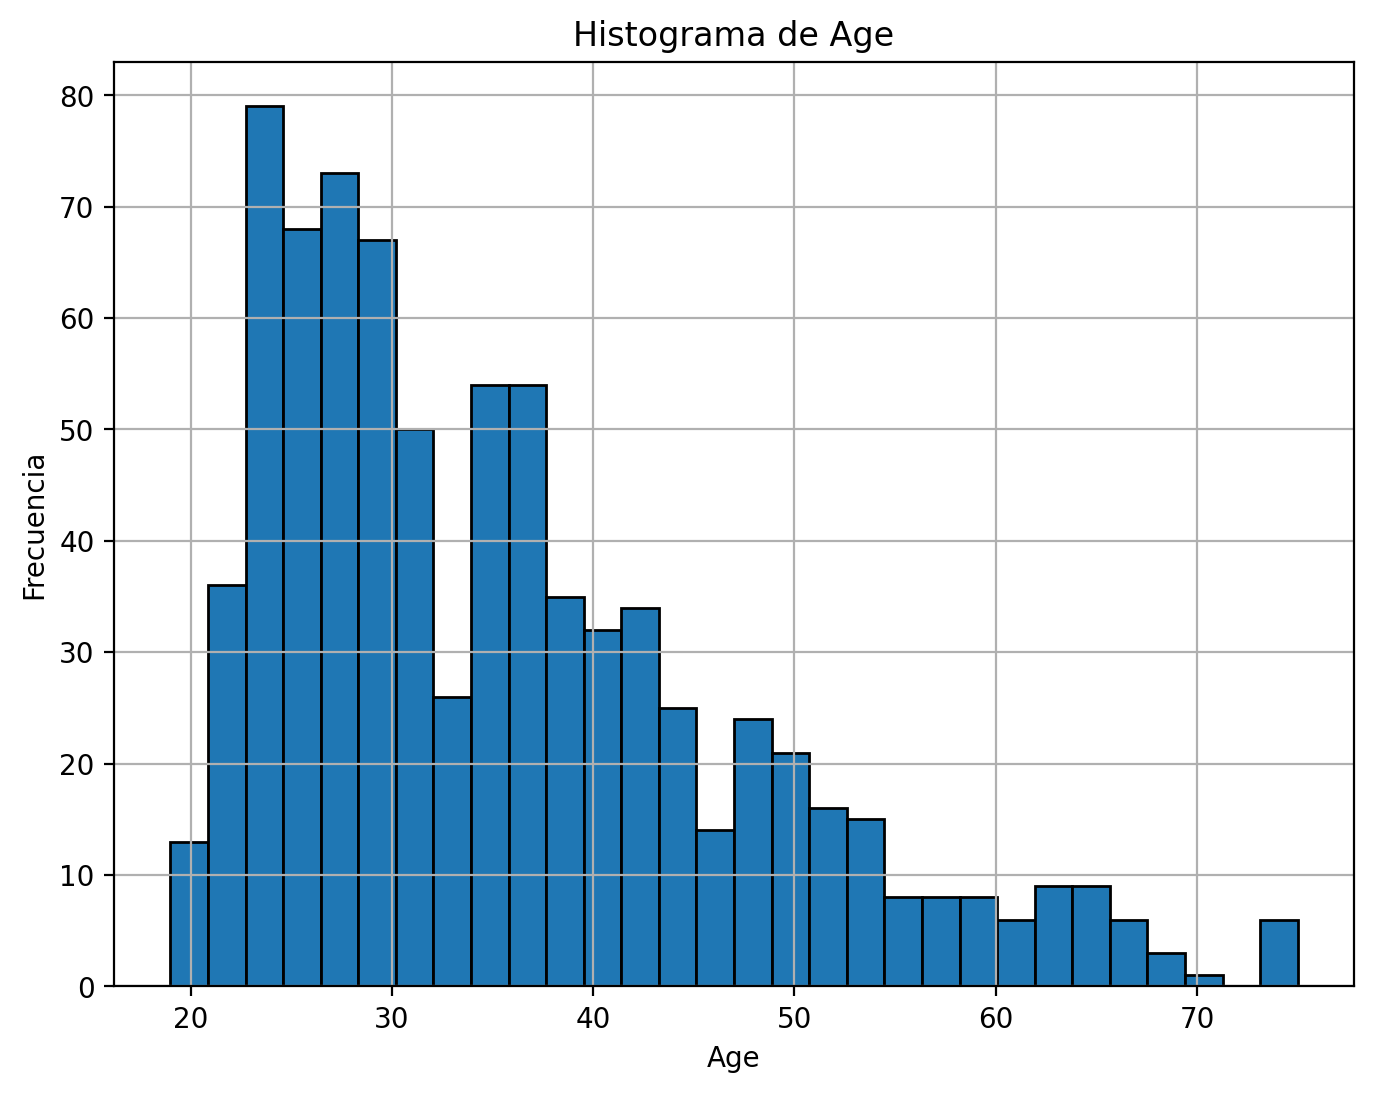

In [ ]:
# Aplicamos la función a las variable "Age" y creamos el histograma
crear_histograma(X_entrenamiento,'Age')


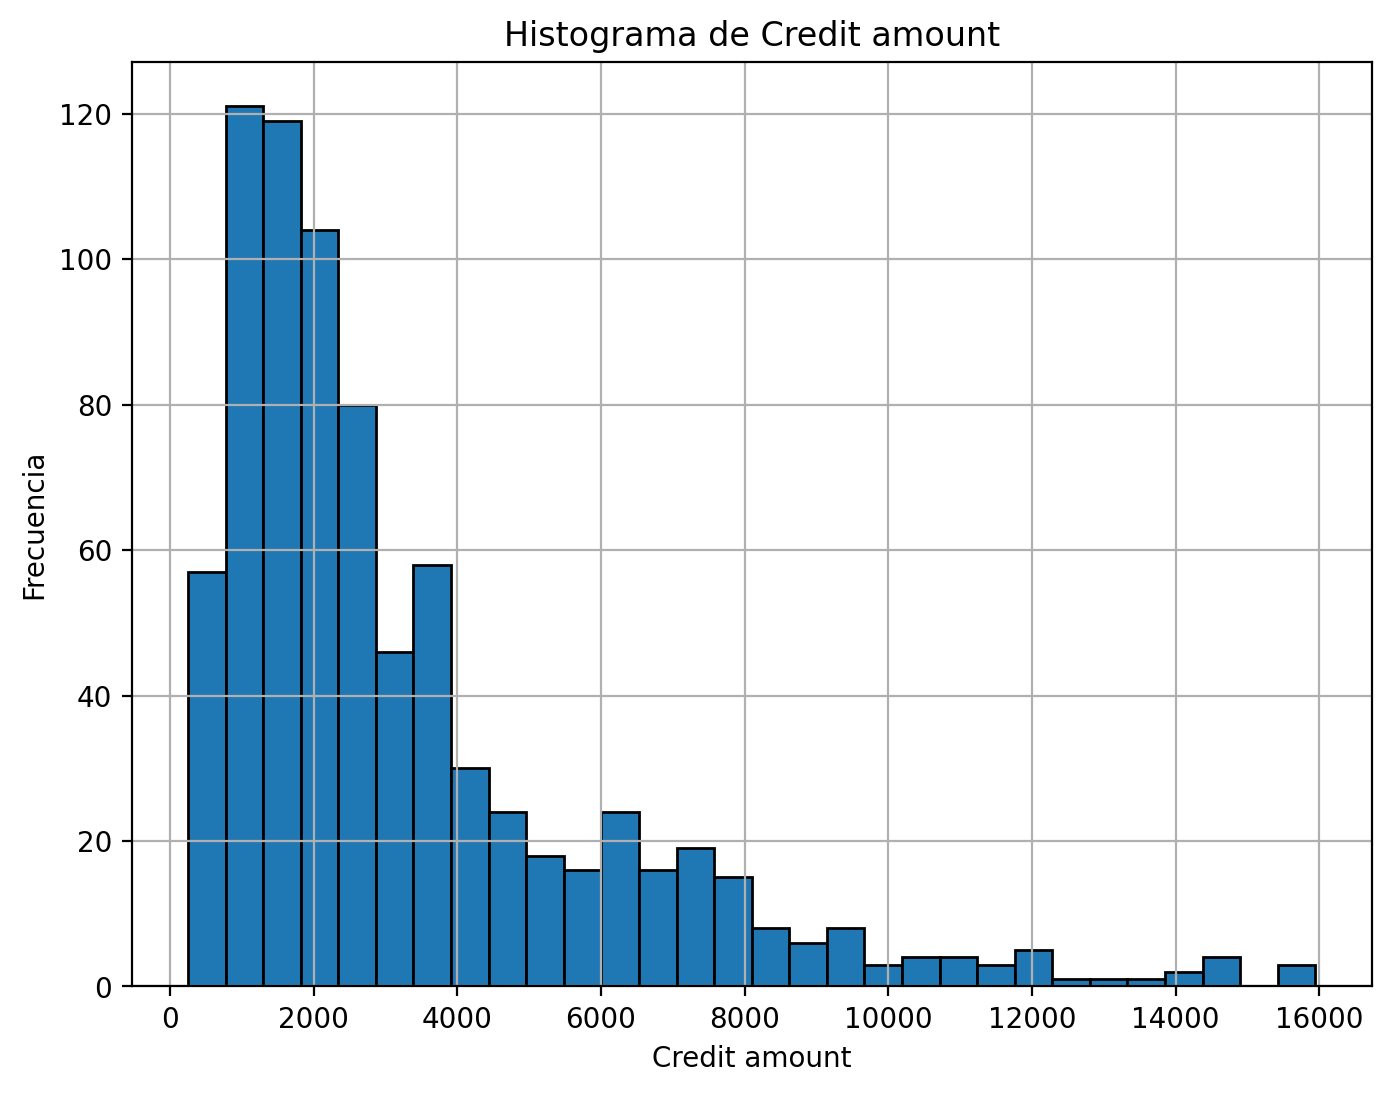

In [ ]:
# Aplicamos la función a la variable "Credit amount" y creamos el histograma
crear_histograma(X_entrenamiento,'Credit amount')


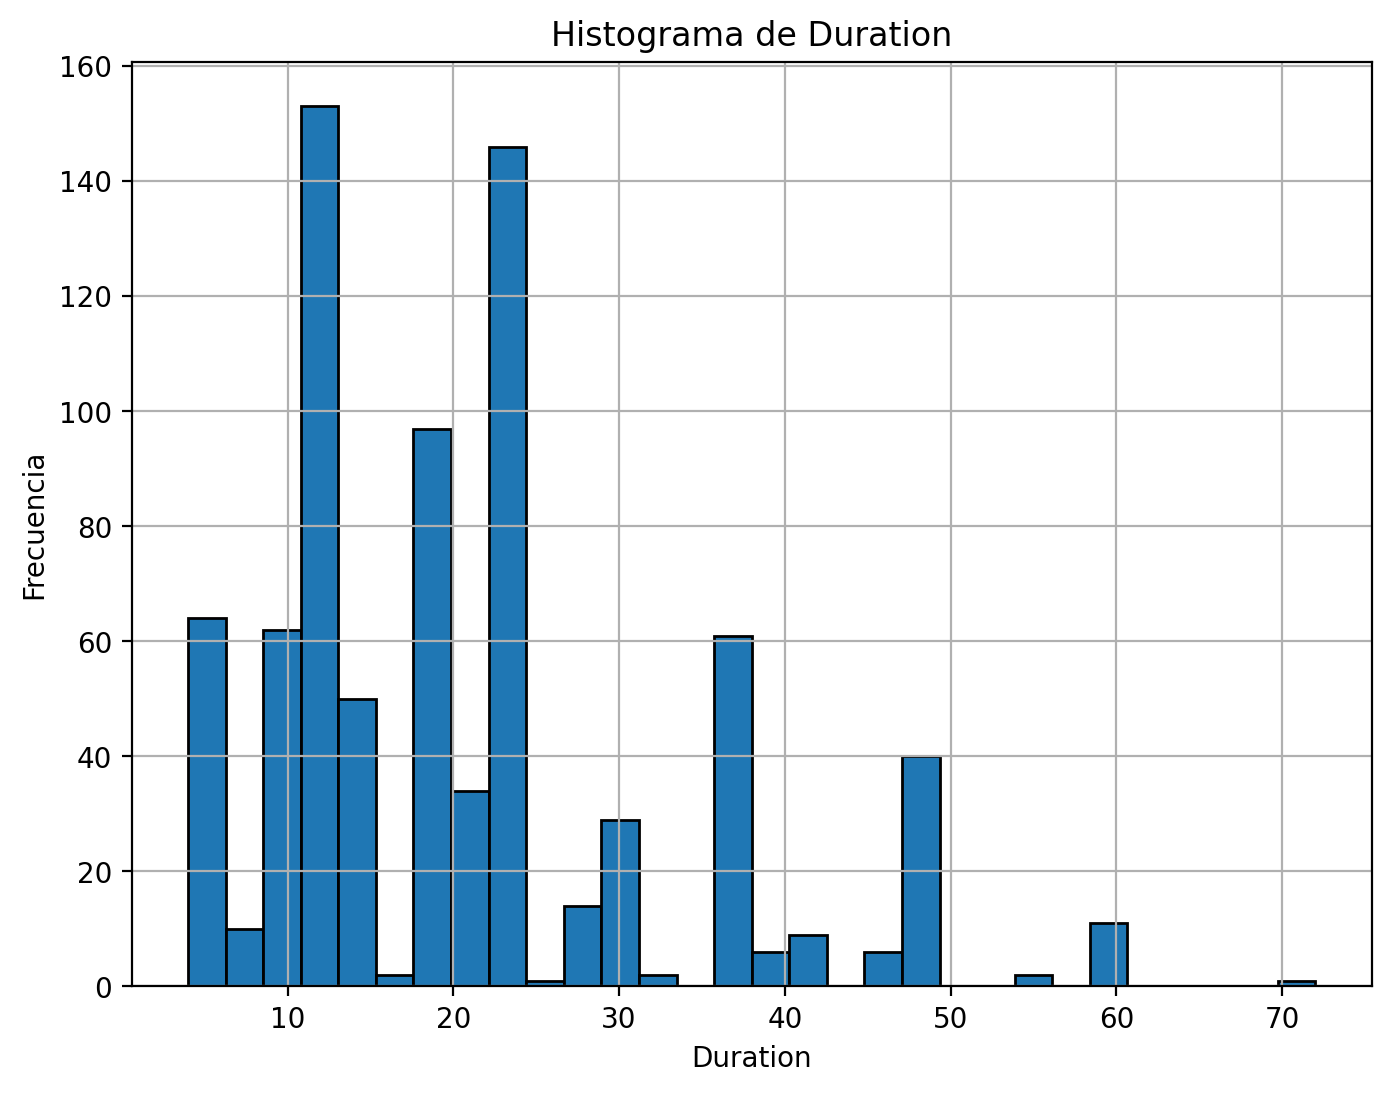

In [ ]:
# Aplicamos la función a la variable "Duration" y creamos el histograma
crear_histograma(X_entrenamiento,'Duration')


## **📊 Interpretación de la Distribución de las Variables**

Tras analizar los histogramas generados para las variables numéricas, observamos lo siguiente:

🔍 **Age**, **Credit amount** y **Duration** presentan **distribuciones con valores extremos y concentraciones anómalas en determinadas zonas**.

📉 Estas características indican que no siguen una distribución normal y **contienen valores atípicos o un rango amplio de datos poco comunes**.

✅ Por ello, concluimos que **la mejor técnica de escalado para estas variables es el uso de MinMaxScaler**, ya que:

- 🔹 Comprime los valores **dentro de un rango entre 0 y 1**.

- 🔹 **Reduce el impacto de los valores extremos** en el aprendizaje del modelo.

###⚙️ Este tipo de escalado **garantiza que todas las variables numéricas tengan una influencia equilibrada durante el proceso de entrenamiento**, mejorando la estabilidad y precisión del modelo final.



In [ ]:
# Creamos el objeto de MinMaxScaler
escalador = MinMaxScaler()

# Ajustamos el escalador a las Variables numericas de los datos de entrenamiento y los transformamos
X_entrenamiento[['Age','Credit amount','Duration']] = escalador.fit_transform(X_entrenamiento[['Age','Credit amount','Duration']])

<ipython-input-18-b44836eae6bc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_entrenamiento[['Age','Credit amount','Duration']] = escalador.fit_transform(X_entrenamiento[['Age','Credit amount','Duration']])


In [ ]:
# Aplicamos la misma escala de los datos de entrenamiento a los datos de Evaluacion para transformarlos
X_evaluacion[['Age','Credit amount','Duration']] = escalador.transform(X_evaluacion[['Age','Credit amount','Duration']])

<ipython-input-19-74df11bda55e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_evaluacion[['Age','Credit amount','Duration']] = escalador.transform(X_evaluacion[['Age','Credit amount','Duration']])


# 🔄 **Cuarta Parte: Tratamiento del Desbalanceo de Clases con Validación Cruzada**

Como mencionamos anteriormente, **el desbalance de clases es uno de los principales desafíos en la detección de fraude crediticio**, ya que las transacciones legítimas son mucho más numerosas que las fraudulentas.

- ✅ Ya aplicamos una primera medida importante: una **división estratificada entre los datos de entrenamiento y prueba**, asegurando que ambas muestras conserven la proporción real de fraudes del dataset.

- 📈 Ahora damos un paso más para **reforzar el entrenamiento del modelo frente a este desbalance**.

####🔁 Implementaremos **Validación Cruzada Estratificada** utilizando la herramienta **StratifiedKFold**, que nos permite:

1️⃣ Dividir el conjunto de entrenamiento en **múltiples subgrupos** (**folds**).

2️⃣ Garantizar que en cada fold la proporción de fraudes y no fraudes **se mantenga igual**.

3️⃣ **Evaluar el modelo de forma más robusta**, al entrenarlo y validarlo repetidamente con datos equilibrados.

###🎯 Con esta técnica, aseguramos que el modelo **no haga más enfoque hacia la clase mayoritaria**, aprendiendo a reconocer patrones de fraude incluso en escenarios con pocos casos, **siendo más justo, más preciso y más confiable al momento de hacer predicciones reales****.



In [ ]:
# Crear una instancia de StratifiedKFold para la validación cruzada estratificada
cv = StratifiedKFold(n_splits=5)

# **🤖 Quinta Parte: Creación del Modelo con TPOT (AutoML)**

Una vez que preparamos todos nuestros datos correctamente, **pasamos a la fase de modelado automático utilizando TPOT**, una poderosa herramienta de **AutoML** que nos ayuda a encontrar el mejor modelo de forma automática.

####🔍 ¿Qué hace TPOT?
TPOT **actúa como un científico de datos automatizado**, utiliza programación genética para probar cientos de combinaciones entre:

- Modelos de Machine Learning.

- Preprocesamientos.

- Configuraciones de hiperparámetros.

Luego, evoluciona las soluciones más prometedoras, **mejorando iterativamente hasta encontrar la más eficiente**.

####🎯 ¿Por qué usamos TPOT en este proyecto de detección de fraude?

✅ **Acelera el proceso de descubrimiento del mejor modelo**.

✅ **Evalúa múltiples técnicas sin intervención manual**.

✅ **Se adapta a la naturaleza del problema**, optimizando el rendimiento para detectar fraudes con alta precisión.

✅ Nos permite ahorrar tiempo valioso y aumentar la efectividad **sin necesidad de probar modelos uno por uno**.

####⚡ Conclusión:
###Con TPOT, obtendremos **un modelo altamente competitivo y personalizado** que responde eficazmente a las necesidades específicas del banco, **enfrentando con inteligencia el problema del fraude crediticio**.




## **🧠 Definición de Modelos Personalizados**

En esta etapa, **personalizamos el espacio de búsqueda de TPOT** para enfocarnos únicamente en dos **modelos altamente efectivos** para la detección de fraudes crediticios:

####1️⃣ XGBoost:

- Un modelo basado en árboles de decisión, **conocido por su alta precisión y velocidad**.

- Es ideal para datos estructurados y desequilibrados, **como los de fraude financiero**.

####2️⃣ Red Neuronal Pequeña:

Una red neuronal no tan compleja, **pero con capacidad de capturar altas relaciones** no lineales en los datos.

####🔧 ¿Por qué restringimos la búsqueda a estos dos modelos?

✅ Enfocamos la potencia de TPOT en **algoritmos avanzados y relevantes**.

✅ **Evitamos pérdidas de tiempo** en modelos menos adecuados para este tipo de problema.

✅ Mejoramos la calidad del resultado final, al asegurarnos que TPOT **pruebe solo soluciones con alto potencial de discriminación entre fraude y no fraude**.

###🧩 Esta personalización estratégica **mejora la eficiencia del proceso de AutoML**, al mismo tiempo que asegura un **modelo más preciso, especializado y adaptado a la realidad del banco y su problema** de riesgo crediticio.



In [ ]:
#Definimos los Modelos
modelos_asignados = {
    # XGBoost
    'xgboost.XGBClassifier': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': range(3, 10),
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0],
        'use_label_encoder': [False],
        'eval_metric': ['logloss']
    },

    # Red neuronal pequeña
    'sklearn.neural_network.MLPClassifier': {
        'hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'activation': ['relu', 'tanh'],
        'solver': ['adam'],
        'alpha': [0.0001, 0.001],
        'learning_rate': ['constant', 'adaptive'],
        'max_iter': [200]
    }
}


##🤖 **Construimos el Modelo de TPOT**

In [ ]:
# Creamos el Modelo, con una versión ajustada para ser bastante rápido de entrenar pero sin perder eficiencia
modelo_tpot = TPOTClassifier(
    generations=5,                 # Solo 5 generaciones
    population_size=25,            # 25 modelos por generación
    verbosity=2,                   # Muestra información del Modelo en pantalla
    n_jobs=-1,                     # Usa todos los núcleos
    config_dict=modelos_asignados, # Usamos el espacio de modelos restringido que armamos
    random_state=99,               # Para reproducibilidad
    cv = cv,                       # Aplicamos la instancia de Validación cruzada estratificada que creamos antes
    scoring='roc_auc',             # ⭐ Métrica clave para trabajar bien este problema de identificar 2 clases
    max_time_mins=60,              # Establecemos un límite de tiempo de 60 minutos, ya que es suficiente tiempo para encontrar un buen Modelo
)


### ✅ **Aplicación Estratégica de AutoML con TPOT Ajustada al Problema de Negocio**

Quiero hacer enfoque en la manera de implementar TPOT, lo hicimos no como un remplazo automático, sino como un asistente inteligente, **optimizado específicamente para el problema de detección de fraude crediticio que presenta el banco**.

En lugar de dejar que TPOT explore un espacio de búsqueda genérico, realizamos varios ajustes estratégicos para alinear el proceso de AutoML con la **lógica del negocio**:

- **Delimitación del Espacio de Modelos**: Definimos una configuración de modelos asignados que prioriza algoritmos especializados en estos casos.

- **Control del Tiempo de Ejecución Necesario**, sin comprometer la calidad del modelo.

- **Optimización en Función del Negocio**: Elegimos "ROC AUC" como métrica, debido a que se enfoca en optimizar y mejorar la capacidad de diferenciar entre fraude y no fraude, **priorizando la correcta gestión de riesgos para el Banco**.


####🧠 Esta forma de aplicar AutoML demuestra un enfoque profesional donde no solo automatizamos, **sino que también pensamos estratégicamente**:

- Entendiendo el problema de negocio.

- Ajustando los recursos técnicos disponibles orientados a lo que necesita el cliente.

- Maximizando el impacto del modelo generado.


###🚀Mostrando con este enfoque mi capacidad de adaptar metodologías de Machine Learning a diferentes escenarios y restricciones del mundo real, asegurando que la solución verdaderamente aporte valor al cliente.

In [ ]:
# Entrenamos el Modelo con los datos de entrenamiento
modelo_tpot.fit(X_entrenamiento, Y_entrenamiento)

Version 0.11.7 of tpot is outdated. Version 1.0.0 was released Wednesday February 26, 2025.
/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprec

Optimization Progress:   0%|          | 0/25 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7652901785714287

Generation 2 - Current best internal CV score: 0.7652901785714287

Generation 3 - Current best internal CV score: 0.7669642857142858

Generation 4 - Current best internal CV score: 0.7699404761904761

Generation 5 - Current best internal CV score: 0.7699404761904761

Best pipeline: XGBClassifier(CombineDFs(input_matrix, input_matrix), colsample_bytree=0.8, eval_metric=logloss, learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.8, use_label_encoder=False)


/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


TPOTClassifier(config_dict={'sklearn.neural_network.MLPClassifier': {'activation': ['relu',
                                                                                    'tanh'],
                                                                     'alpha': [0.0001,
                                                                               0.001],
                                                                     'hidden_layer_sizes': [(50,),
                                                                                            (100,),
                                                                                            (50,
                                                                                             50)],
                                                                     'learning_rate': ['constant',
                                                                                       'adaptive'],
                                                                     'max_iter': [200],
                                                                     'solver': ['adam']},
                            'xgboost.XGBClassifier': {'colsample_bytree': [0.8,
                                                                           1.0],
                                                      'eval_metric': ['logloss'],
                                                      'learning_rate': [0.01,
                                                                        0.1],
                                                      'max_depth': range(3, 10),
                                                      'n_estimators': [100,
                                                                       200],
                                                      'subsample': [0.8, 1.0],
                                                      'use_label_encoder': [False]}},
               cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
               generations=5, max_time_mins=60, n_jobs=-1, population_size=25,
               random_state=99, scoring='roc_auc', verbosity=2)

# 🤖 **Modelo encontrado por TPOT**

Aunque limitamos la búsqueda a XGBoost y Redes Neuronales, TPOT fue capaz de explorar múltiples configuraciones de ambos y **seleccionar una combinación óptima de los 2 algoritmos, que aprovecha las fortalezas de cada uno**.

- 🔹 XGBoost aporta precisión, velocidad y manejo de datos complejos.

- 🔹 Red Neuronal, permite capturar patrones más profundos que XGBoost no puede.

**🔧 En lugar de elegir solo uno de los dos algoritmos, TPOT combinó inteligentemente lo mejor de ambos, creando un modelo único y más eficaz, capaz de ofrecer decisiones más precisas y alineadas al objetivo del negocio.**

####⚙️ ¿El resultado?

###Un modelo robusto, preciso y adaptado al negocio, diseñado para tomar decisiones estratégicas que maximizan la utilidad y reducen riesgos, **alineado a las necesidades que presenta el problema**.



# 🎯**Sexta Parte: Personalización del Umbral según los Costos y Beneficios del Banco**

## **¿Qué es el Punto de Corte o Umbral y por qué lo Personalizamos?**
En un modelo de riesgo crediticio, no basta con predecir si alguien pagará o no un crédito, **lo esencial es que el modelo tome decisiones alineadas con lo que el banco realmente necesita**.

####🧠 El punto de corte funciona como un filtro inteligente:
Decide a partir de qué probabilidad un solicitante será considerado como riesgoso y, por lo tanto, **su crédito no debería ser aprobado**.

🔁 En lugar de usar un Umbral génerico, lo que hacemos es **ajustar ese umbral con base en los costos y beneficios reales del banco,esto transforma al modelo en una herramienta estratégica que aporta valor real**

####💸 Costos y Beneficios definidos por el Banco:
El banco estableció **cuánto gana o pierde en cada tipo de decisión que el modelo pueda tomar**:

- ✅ Beneficio por **detectar correctamente a un solicitante riesgoso** (TP): $1,500.

- ❌ Costo por **rechazar por error a un buen cliente** (FP): –$300.

- ⚠️ Costo por **aprobar erróneamente a un cliente que no pagará** (FN): –$8,000.

- ✔️ Beneficio por **aprobar correctamente a un buen cliente** (TN): $100.

Estos valores nos permiten medir la utilidad económica real de cada predicción del modelo.

Podemos observar que **solamente por aprobar mal un crédito puede causar una pérdida de $8000**, lo que es una cantidad grande por cada persona aprobada érroneamente.

####🧩 ¿Cómo toma decisiones el Modelo?
- Verdaderos Positivos **(TP)**: El modelo predice que un cliente es riesgoso, y efectivamente lo es.

- Falsos Positivos **(FP)**: El modelo cree que un cliente es riesgoso, pero en realidad era confiable.

- Falsos Negativos **(FN)**: El modelo aprueba a alguien que no pagará, lo que genera grandes pérdidas.

- Verdaderos Negativos **(TN)**: El modelo aprueba correctamente a un buen cliente.

###**Estos conceptos son clave para entender cómo un modelo puede generar o perder dinero**.


In [ ]:
# Definimos los Costos y beneficios asignados por el Banco
beneficio_TP = 1500   # Beneficio por detectar correctamente a un solicitante riesgoso (Verdaderos Positivos)
costo_FP = -300       # Costo por si se rechaza por error a un buen cliente (Falsos Positivos)
costo_FN = -8000      # Costo por aprobar erróneamente a un cliente que no pagará (Falsos Negativos)
beneficio_TN = 100    # Beneficio por aprobar correctamente a un buen cliente (Verdaderos Negativos)

##🚀 **¿Cómo logramos un modelo verdaderamente Personalizado?**

Aplicamos una técnica que prueba distintos Umbrales y **elige aquel que genera la máxima utilidad económica para el banco**.

####⚙️ Este umbral personalizado es el que:

- **Maximiza las decisiones correctas**.

- **Reduce los errores más costosos**.

- Y, sobre todo, **optimiza la estrategia crediticia del banco, tomando las decisiones que mas le convienen**.

####⚖️ Función de Utilidad y Función de Costo
🔹 **Función de Utilidad**: mide lo que el banco gana al identificar correctamente a clientes riesgosos y confiables.

🔹 **Función de Costo**: mide las pérdidas por errores de clasificación que afectan directamente las finanzas.

####  ¿Qué logramos con esto?
📌 Un modelo que no solo predice, sino que **actúa estratégicamente**.

📌 **Alinear las decisiones a los intereses reales del banco**.

📌 Aumentar la rentabilidad y **reducir el riesgo financiero**.

📌 Aprovechar al máximo los datos, **convertiéndolos en decisiones inteligentes**.

####✅ Gracias a este enfoque creamos un modelo 100% personalizado, que aprende a tomar **las decisiones que más le convienen al Banco, evitando grandes pérdidas económicas por la toma de malas decisiones**.


In [ ]:
# Obtenemos las predicciones del Modelo encontrado con TPOT
y_pred = modelo_tpot.predict(X_evaluacion)

In [ ]:
# Obtenemos las predicciones del Modelo en probabilidades
y_proba = modelo_tpot.predict_proba(X_evaluacion)[:, 1]

In [ ]:
# Obtenemos el fpr, el tpr y los puntos de corte para encontrar el Umbral mas óptimo
fpr, tpr, puntos_de_corte = roc_curve(Y_evaluacion, y_proba)

In [ ]:
# Aseguramos que los datos estén en formato array
Y_real = np.array(Y_evaluacion)

# Lista para almacenar utilidad por cada umbral
utilidades = []

# Calcular la utilidad para cada punto de corte (umbral)
for umbral in puntos_de_corte:
    # Convertir probabilidades en predicciones binarias
    Y_pred_binario = (y_proba >= umbral).astype(int)

    # Matriz de confusión manual para encontrar el mejor Umbral
    TP = np.sum((Y_pred_binario == 1) & (Y_real == 1))
    FP = np.sum((Y_pred_binario == 1) & (Y_real == 0))
    FN = np.sum((Y_pred_binario == 0) & (Y_real == 1))
    TN = np.sum((Y_pred_binario == 0) & (Y_real == 0))

    # Calcular utilidad económica total
    utilidad = (
        TP * beneficio_TP +
        FP * costo_FP +
        FN * costo_FN +
        TN * beneficio_TN
    )

    # Almacenar la utilidad máxima que obtuvimos con el mejor Umbral encontrado utilidad
    utilidades.append(utilidad)


In [ ]:
# Convertimos puntos de corte y utilidades a arrays para más eficiencia
puntos_de_corte = np.array(puntos_de_corte)
utilidades = np.array(utilidades)

# Asignamos la Utilidad Máxima y el Umbral óptimo
indice_mejor_umbral = np.argmax(utilidades)
mejor_umbral = puntos_de_corte[indice_mejor_umbral]
mejor_utilidad = utilidades[indice_mejor_umbral]

# Mostramos los resultados obtenidos
print(f"Mejor umbral económico: {mejor_umbral:.4f}")
print(f"Máxima utilidad esperada: ${mejor_utilidad:.2f}")

Mejor umbral económico: 0.0339
Máxima utilidad esperada: $54400.00


### 📊 **Resultados con el Umbral Económico Personalizado**
Tras aplicar la técnica de personalización del umbral, el modelo ha identificado que el punto de corte más conveniente para el banco es:

🔍 **Umbral óptimo**: 0.0339.

💰 **Utilidad económica máxima esperada**: $54,400.00.

####💡 ¿Qué significa esto en términos prácticos?
En lugar de tomar decisiones aleatorias y sin desalineadas, el modelo ahora decide **quién representa un riesgo crediticio y quién no** a partir de una probabilidad tan baja como **3.39%**, lo cual tiene sentido cuando los costos por aprobar a un cliente riesgoso que no pagará son tan altos como en este caso.

Este nuevo umbral fue calculado para **maximizar los beneficios y minimizar las pérdidas reales del banco**, considerando:

- La pérdida fuerte por aprobar clientes que no pagarán.

- El beneficio importante por detectar a tiempo esos perfiles riesgosos.

- El costo menor pero importante por rechazar a alguien confiable por error.

####🚀 ¿Qué impacto genera esto?
✅ **Decisiones más inteligentes**: guiandose por lo que es más conveniente.

✅ **Rentabilidad mejorada**: se espera una utilidad de hasta **$54,400.00**, directamente gracias a la calidad de las decisiones.

✅ **Optimización de recursos**: se concentra el esfuerzo en perfiles realmente estratégicos, sin malgastar oportunidades ni asumir riesgos innecesarios.

✅ **Alineación total con la realidad del banco**: cada predicción se hace pensando en el costo-beneficio real que implica.

####🔐 En resumen:
###**Este resultado demuestra cómo un modelo de riesgo crediticio, cuando es bien ajustado y adaptado a la economía del cliente, deja de ser solo un sistema de predicción para convertirse en una herramienta de decisión estratégica y rentable**.












#🧩 **Séptima Parte: Comprendiendo cómo el modelo toma decisiones personalizadas con el Umbral optimizado**

Una vez que ajustamos el Umbral de decisión con base en los costos y beneficios reales del banco, **dejamos de enfocarnos únicamente en las métricas tradicionales** como precisión o F1-score.

Ahora el enfoque es **entender cómo el modelo está tomando decisiones que representan valor real para el cliente**.

Es decir, cómo prioriza a quién aprobar y a quién rechazar, **considerando lo que más le conviene financieramente al banco**.

####🛠️ ¿Cómo analizamos este comportamiento?
###**Para evaluar cómo el modelo actúa bajo este nuevo criterio, utilizamos herramientas clave como:**

##📋  **Reporte de Clasificación con umbral ajustado**
####Este reporte nos permite ver:

- 🔎 Cómo se distribuyen las decisiones del modelo, **quiénes fueron aprobados o rechazados**.

- 🎯 **Qué riesgos está asumiendo el modelo de forma controlada**, por ejemplo, permitir ciertos falsos positivos para evitar falsos negativos que generan pérdidas más grandes.

- 📈 **Si el modelo está cumpliendo su propósito**: reducir el riesgo de pérdidas elevadas, **detectar perfiles realmente riesgosos y mantener una operación rentable**.

####✅ En resumen:
El reporte de clasificación bajo el umbral optimizado nos muestra si el modelo realmente está:

🔐 **Protegiendo al banco de pérdidas por créditos mal otorgados**.

📊 **Priorizando a los perfiles con mayor probabilidad de cumplir con el pago**.

🎯 **Cumpliendo con los objetivos comerciales y financieros**.

###Este análisis revela si el modelo aprendió a decidir con inteligencia económica y alineado a lo que necesita el Banco.

In [ ]:
# Obtenemos las predicciones finales ajustadas con el Umbral óptimo
y_pred_final = (y_proba >= mejor_umbral).astype(int)

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128203 (\N{CLIPBOARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


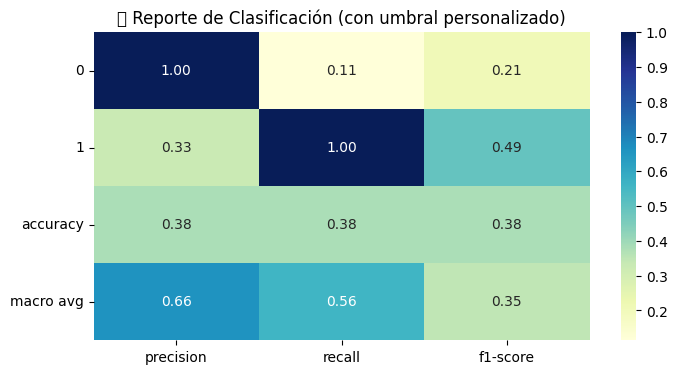

In [ ]:
# Obtenemos el Reporte de Clasificacion
reporte_dict = classification_report(Y_evaluacion, y_pred_final, output_dict=True)
# Lo convertimos en un DataFrame para graficarlo
df_reporte = pd.DataFrame(reporte_dict).transpose()

# # Graficamos el Reporte de Clasificación
plt.figure(figsize=(8, 4))
sns.heatmap(df_reporte.iloc[:-1, :-1], annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("📋 Reporte de Clasificación (con umbral personalizado)")
plt.yticks(rotation=0)
plt.show()

In [ ]:
# Mostramos el Reporte de Clasificación en texto
print("Reporte de Clasificación:")
print(classification_report(Y_evaluacion, y_pred_final))

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      0.11      0.21       140
           1       0.33      1.00      0.49        60

    accuracy                           0.38       200
   macro avg       0.66      0.56      0.35       200
weighted avg       0.80      0.38      0.29       200



###**¿Qué nos dice este reporte sobre el comportamiento del modelo?**

Veamos como el Modelo está tomando decisiones alineadas a lo que le conviene al Banco, que es evitar perdidas por el fraude crediticio:

####1- 🔎 Clase 1, Clientes con Riesgo Crediticio:
- ✅ Recall: 1.00 → **El modelo detecta todos los casos de riesgo**.

 ⚠️ Esto significa que **ningún cliente riesgoso fue pasado por alto**, lo cual es crítico para **proteger al banco de pérdidas grandes**.

 📌 Precisión baja de 0.33, eso se traduce en que **el modelo prefiere equivocarse clasificando como riesgoso a un cliente que no lo es**, antes que correr el riesgo de **dar crédito a alguien que no podrá pagarlo**.

####2- 🔎 Clase 0, Clientes sin Riesgo Crediticio:

- ❌ Recall bajo de 0.11 → **El modelo solo logra identificar correctamente a unos pocos clientes confiables**.

 ✅ Pero esto **está dentro del riesgo controlado que al cliente le conviene aceptar**, ya que es preferible decir "no" a algunos buenos clientes, si eso evita aprobar a los malos.

####📌 En resumen:
- 🔐 El modelo prioriza evitar pérdidas grandes por riesgo de impago, aun sacrificando parte de las ganancias pequeñas.

- 💡 Esto está alineado con la estrategia mas conveniente para el banco:

 **"Es mejor prevenir una pérdida de $8,000, que obtener una ganancia de solamente 100 dólares"**

####✅ Conclusión:
El modelo está tomando decisiones inteligentes basadas en la utilidad económica definida, no en métricas tradicionales.

###**Y eso es justamente lo que hace a este enfoque tan poderoso: el modelo aprende a decidir a como le conviene más al propio banco**.

##🔲 **Matriz de Confusión**
La matriz de confusión nos muestra con claridad cuántas veces el modelo acierta o se equivoca, y en qué tipo de decisiones lo hace, **esta herramienta nos ayuda a entender el comportamiento estratégico del modelo**:

####📌 ¿Qué revela esta matriz en un modelo de riesgo crediticio?

- 🔍 **Qué tipo de errores el modelo está dispuesto a aceptar**, si eso significa evitar el error más costoso.

- 🎯 **Si el modelo prioriza rechazar a quienes representan mayor peligro financiero**, incluso si eso implica rechazar a alguien que sí habría pagado, pero solo so eso se alinea con la estrategia del banco.

- 📊 **Cómo el modelo está aplicando las condiciones personalizadas del cliente**.

####🧠 En pocas palabras:


###✅ La matriz de confusión es la evidencia clara de que el modelo no solo predice, sino que decide estratégicamente, como lo haría un analista del banco: con lógica financiera, priorizando estabilidad, rentabilidad y reducción del riesgo.

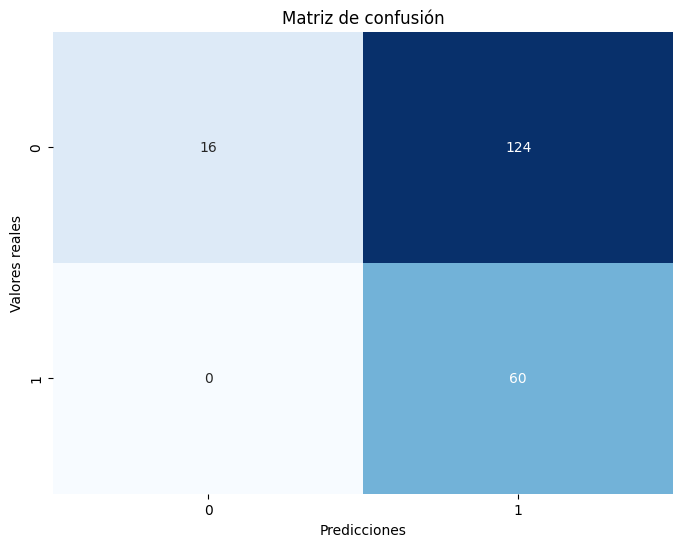

In [ ]:
# Graficamos la Matriz de Confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(Y_evaluacion, y_pred_final), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de confusión')
plt.show()


In [ ]:
# Mostramos la Matriz de Confusión en Texto
print("Matriz de confusión:")
print(confusion_matrix(Y_evaluacion, y_pred_final))

Matriz de confusión:
[[ 16 124]
 [  0  60]]


###🧩 **¿Qué nos está diciendo el modelo en base a los Resultados?**

####✅ Verdaderos Positivos (TP = 60):

- **60 casos de riesgo fueron correctamente identificados**.

 🔐 Esto significa que **el banco logró detectar el 100% de los clientes con alto riesgo crediticio, evitando potenciales pérdidas grandes**, es el comportamiento más valioso para el cliente.

####❌ Falsos Positivos (FP = 124):
- **124 clientes sin riesgo fueron clasificados como si lo tuvieran**.

 ⚠️ Aunque esto puede significar perder algunas oportunidades de negocio, **al banco le conviene más protegerse ante el riesgo**, lo cual es una decisión estratégica, debido a que esos clientes presentaban algunos comportamientos sospechosos.

####✅ Verdaderos Negativos (TN = 16):
- **Solo 16 clientes sin riesgo fueron correctamente identificados**.

 Aunque es un número bajo, **está dentro del margen de riesgo que le conviene aceptar al cliente**.

####❌ Falsos Negativos (FN = 0):

- 🔥 **¡No se escapó ni un solo cliente riesgoso!**

 Este es el mayor logro del modelo, pues el costo de aprobar un cliente riesgoso es extremadamente alto, **–$8,000 por caso**, y el modelo **logró evitar completamente ese escenario**.

####🎯 Conclusión:

📌 El modelo está tomando decisiones bajo un criterio de utilidad económica dónde:

- Prefiere ser conservador para evitar pérdidas millonarias,

- Incluso si eso implica ser estricto con algunos buenos clientes.

###💡 **Este comportamiento no es un error, es una decisión estratégica personalizada que protege al banco y maximiza su beneficio económico total**.

# 📈 **Octava Parte: Obtenemos el AUC del Modelo y Graficamos la Curva ROC**

####📊 ¿Qué es el AUC y por qué es importante?
El AUC (Área Bajo la Curva) es una medida que nos dice qué tan bien el modelo logra diferenciar entre dos tipos de clientes:

🟢 **Los que sí representan un riesgo crediticio**.

⚪ **Los que no representan riesgo**.

⚠️ El AUC **nos permite entender si el modelo está tomando decisiones inteligentes**, separando correctamente a los buenos clientes de los riesgosos.


####📈 ¿Qué nos muestra la Curva ROC?
La Curva ROC es un gráfico que **ayuda a ver cómo se comporta el modelo cuando cambiamos el umbral de decisión**, nos muestra dos cosas:

- ✅ Cuántos riesgos reales logra detectar.

- ❌ Cuántas veces se equivoca clasificando como riesgoso a alguien que no lo es.

####🧪 ¿Para qué usamos esto?

- **Para saber si el modelo cumple correctamente con detectar los Fraudes**.

- **Para visualizar su comportamiento en todos los posibles escenarios**.

- **Y sobre todo, para entender si ayuda al banco a tomar mejores decisiones, con base en la realidad económica**.

###🔁 Al graficarla, podemos ver cómo se comporta el modelo a lo largo de todos los umbrales posibles y comprobar su capacidad de decisión.



In [ ]:
# Obtenemos el AUC del Modelo
auc_calculado = roc_auc_score(Y_evaluacion, y_proba)

In [ ]:
# Funcion para graficar la Curva
def graficar_curva_roc(fpr, tpr, auc_calculado, guardar_imagen=False, nombre_archivo= "curva_ROC.png"):
    # Validación básica, para evitar que se pare el codigo
    if fpr is None or tpr is None or auc_calculado is None:
        raise ValueError("Debes proporcionar valores válidos para FPR, TPR y AUC.")

    # Crear gráfico
    plt.figure(figsize=(10, 6), dpi=300)
    sns.lineplot(x=fpr, y=tpr, label=f"AUC = {auc_calculado:.2f}", color="blue")

    # Línea base (modelo aleatorio)
    plt.plot([0, 1], [0, 1], linestyle="--", color="red", label="Línea Base")

    # Personalización
    plt.xlabel("Tasa de Falsos Positivos (FPR)", fontsize=12)
    plt.ylabel("Tasa de Verdaderos Positivos (TPR)", fontsize=12)
    plt.title(f"Curva ROC - AUC: {auc_calculado:.2f}", fontsize=14, fontweight="bold")
    plt.legend(fontsize=10)
    plt.grid(True, linestyle="--", alpha=0.6)

    # Guardar imagen si se solicita (opcional)
    if guardar_imagen:
        plt.savefig(nombre_archivo, dpi=300)

plt.show()


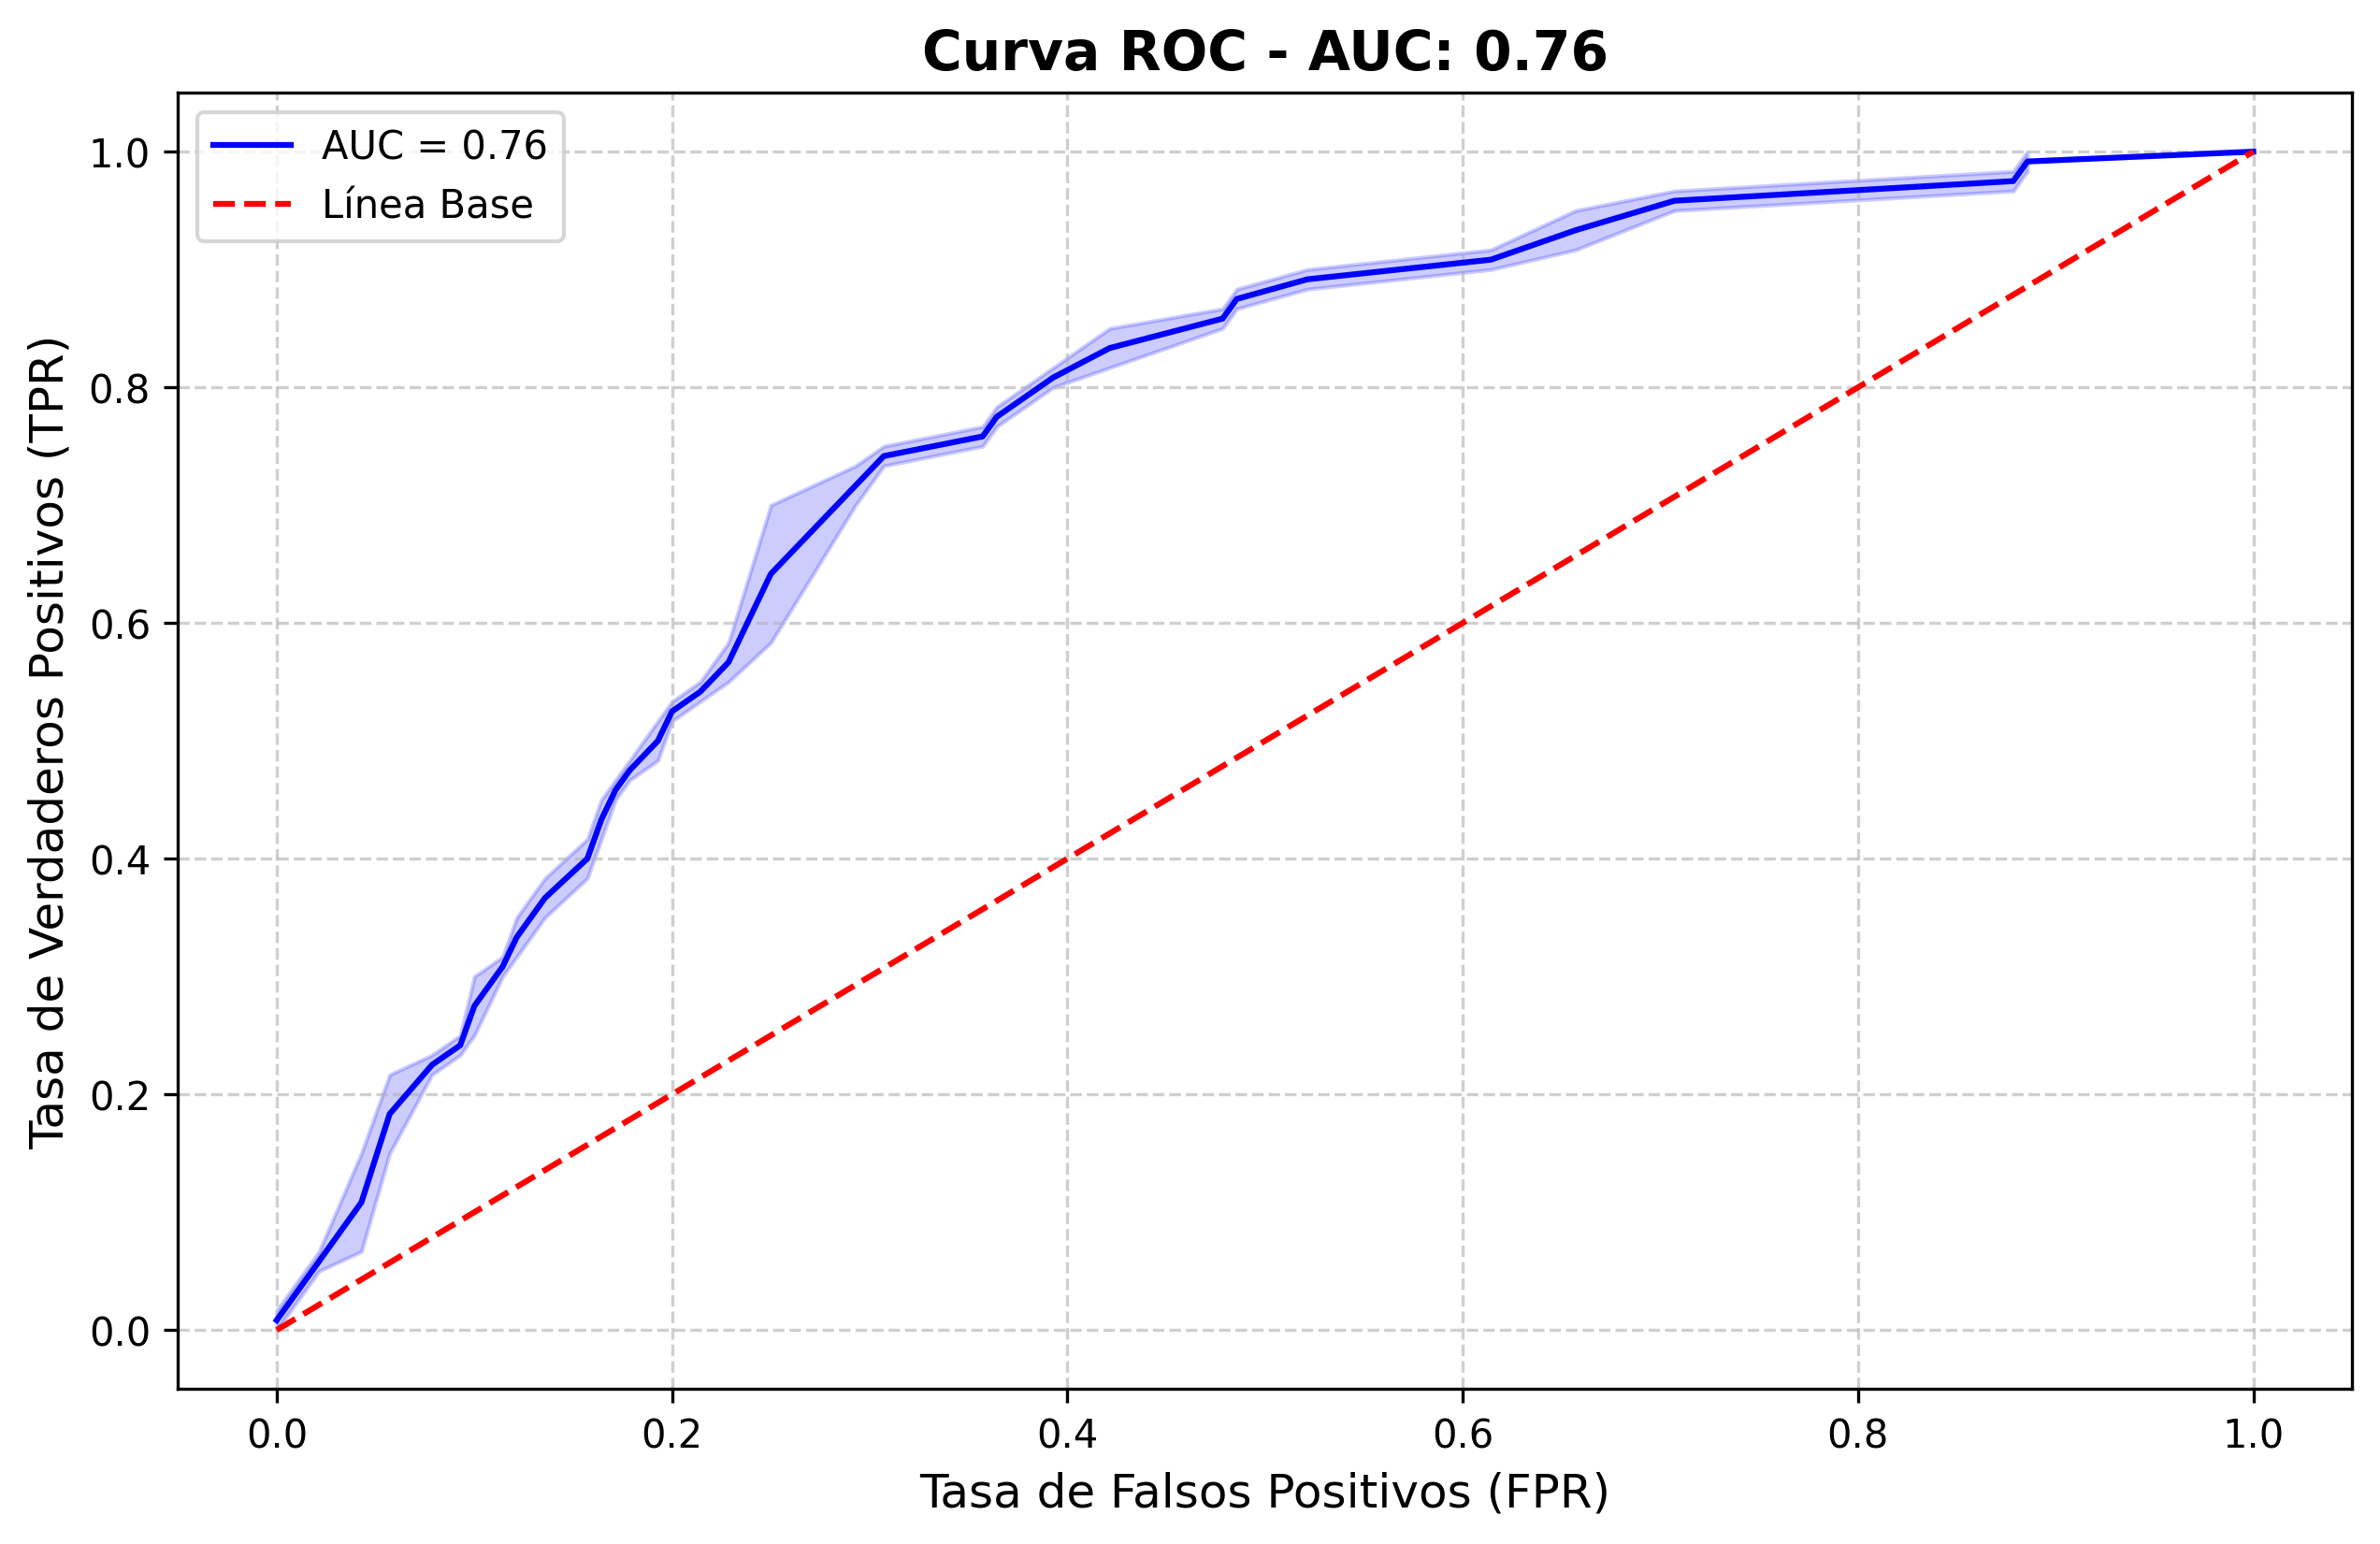

In [ ]:
# Creamos el gráfico aplicando la función
graficar_curva_roc(fpr, tpr, auc_calculado)

##**📊 Interpretación de la Curva ROC – AUC: 0.76**
####🔎 ¿Qué vemos aquí?

La curva ROC **muestra cómo el modelo distingue entre clientes con alto riesgo de fraude y clientes confiables** de no fraude.

- 📈 El valor AUC = 0.76 nos indica que **el modelo tiene una muy buena capacidad para diferenciar ambas clases**.

 Esto significa que, si tomamos al azar entre un cliente riesgoso y uno no riesgoso, **hay un 76% de probabilidad de que el modelo coloque al cliente riesgoso con una mayor probabilidad de cometer fraude**.

####🧠 ¿Por qué es valioso para el cliente?
- ✅ El AUC **se encuentra dentro del rango de rendimiento aceptado en muchos entornos reales** (0.70 – 0.80).

 📌 Lo más importante es que el modelo sabe **distinguir correctamente entre fraude y no fraude** que es lo más fundamental para alinearse con la conveniencia del Banco

###💰 Gracias a esto, el banco puede actuar con más seguridad al identificar con claridad los casos en los que debe tener más cuidado y **evitar grandes pérdidas económicas, que es el objetivo principal**.

#🧠 **Novena Parte: Impacto y Mejoras que Obtenemos luego de Aplicar el Modelo**

Al implementar este modelo de predicción de fraudes con un umbral optimizado según los costos y beneficios reales del cliente, no solo se mejora el rendimiento técnico, sino que **se generan mejoras tangibles en los indicadores económicos clave del banco**.

###A continuación, se presentan los **principales beneficios cuantificables que validan el impacto real del modelo en la operación financiera**.

## **Calculamos la tasa de deteccion de Fraude antes y despues de aplicar el Modelo**




In [ ]:
# Tasa de deteccion de fraude sin aplicar el Umbral optimo
tasa_fraude_real = np.mean(Y_real)  # y_true contiene las etiquetas verdaderas del conjunto de evaluación
print(f"📌 Tasa general de detección de fraude antes de aplicar el Modelo: {tasa_fraude_real * 100:.4f}%")
# Tasa de deteccion de fraude despues de aplicar el Umbral optimo
tasa_fraude_detectada = np.mean(y_pred_final)  # y_pred_final contiene las predicciones 0/1 con el umbral personalizado
print(f"🎯 Tasa de detección de fraude del modelo con el umbral igual a {mejor_umbral:.4f}: {tasa_fraude_detectada * 100:.4f}%")


📌 Tasa general de detección de fraude antes de aplicar el Modelo: 30.0000%
🎯 Tasa de detección de fraude del modelo con el umbral igual a 0.0339: 92.0000%


###🔍 **Análisis de Tasa de Detección de Fraude Antes y Después**

####📌 Antes de aplicar el modelo:

En el enfoque tradicional o **sin asistencia de un modelo predictivo**, la capacidad del sistema para detectar fraudes era extremadamente limitada:

🚨 **Tasa general de detección de fraude: 30.00%**

Esto implica que **7 de cada 10 fraudes pasaban desapercibidos**, generando **pérdidas económicas significativas** y afectando la seguridad financiera del banco.

####🎯 Después de aplicar el modelo con umbral óptimo de 0.0339:

Al aplicar un modelo de clasificación ajustado con un **umbral personalizado en función de los costos y beneficios reales del cliente**, la tasa de detección de fraude aumentó drásticamente:

**✅ Tasa de detección de fraude: 92.00%**

Esto significa que el modelo es capaz de identificar de manera temprana y efectiva **9 de cada 10 fraudes**, permitiendo al banco **actuar proactivamente y evitar pérdidas**.

####💼 ¿Qué implica esto para el banco?
- ✅ **Seguridad reforzada**: una gran cantidad de fraudes son detectados correctamente.

- ✅ **Menos pérdidas financieras**: gracias a una intervención temprana y precisa.

- ✅ **Decisiones estratégicas más confiables**, basadas en evidencia cuantificable y personalizada.

- ✅ **Ventaja competitiva frente a otros sistemas que usan modelos genéricos sin ajuste económico**.

####💡 Conclusión
**Mejorar la tasa de detección del 30% al 92%** demuestra que este no es solo un modelo técnico, sino **una herramienta de impacto real en la operación diaria del banco**.

###Con este nivel de precisión, se transforma la gestión del riesgo en una ventaja estratégica.



## **Comparamos la Utilidad antes y Después de Aplicar el Modelo de Predicción**

In [ ]:
# Obtenemos el comportamiento antes de aplicar el Modelo
fraudes = np.sum(Y_evaluacion == 1)   # Casos de fraude reales
no_fraudes = np.sum(Y_evaluacion == 0)  # Casos normales reales

# Obtenemos la Utilidad antes de aplicar el Modelo
utilidad_sin_modelo = (fraudes * costo_FN) + (no_fraudes * beneficio_TN)

# Mostramos la Utilidad
print(f"💸 Utilidad sin aplicar modelo: ${utilidad_sin_modelo:,.2f}")

# Mostramos la Utilidad despues de aplicar el Modelo, ya la habiamos calculado anteriormente
print(f"🚀 Utilidad aplicando el modelo con umbral óptimo igual a: ${mejor_utilidad:,.2f}")

💸 Utilidad sin aplicar modelo: $-466,000.00
🚀 Utilidad aplicando el modelo con umbral óptimo igual a: $54,400.00


### 📊 **Análisis de Resultados Obtenidos**

####🔴 Escenario sin modelo:

En el escenario base, donde no se aplica ningún modelo predictivo y, por tanto, **no se hace ninguna distinción entre transacciones fraudulentas y legítimas**, la utilidad total fue de:

**💸 $-466,000.00**

Este resultad refleja **el impacto financiero negativo que tiene no detectar fraudes**: altos costos por fraudes no identificados, sin ninguna acción preventiva.

####🟢 Escenario con modelo y umbral optimizado:
Aplicando nuestro modelo de predicción de fraude crediticio **con un umbral ajustado específicamente en función de los costos y beneficios reales del cliente**, la utilidad alcanzada fue de:

**🚀 $54,400.00**

Esto representa una mejora de 💸**$520,400.00 respecto al escenario sin modelo**.

####🎯 ¿Qué significa esto para el negocio?

- ✅ El modelo no solo clasifica transacciones, también **genera valor económico real**.

- ✅ La optimización del umbral fue clave: no se eligió el 0.5 por defecto, sino **el punto donde obtenemos la utilidad máxima**.

- ✅ **Se evitaron pérdidas importantes por fraudes no detectados y se minimizaron decisiones erróneas costosas**.

####💡 Conclusión
###Este resultado no solo valida el rendimiento técnico del modelo, sino su capacidad para **mejorar directamente la rentabilidad del banco**, aplicando Inteligencia Artificial de forma inteligente y **alineada con los objetivos económicos del negocio**.

# **🧩 Décima Parte: Segmentación de Clientes con Probabilidad Alta de Fraude**

En esta etapa del análisis, damos un paso más allá del simple pronóstico.

No solo queremos saber quién tiene alta probabilidad de fraude, **sino también cómo se comportan esos posibles casos fraudulentos y qué patrones tienen en común**, también entenderemos los patrones en los que el Modelo se basó para poder evitar todos los Fraudes.


####💡 ¿Para qué sirve esto?
Nos ayuda a:

- Descubrir grupos de riesgo con patrones similares y **comprender cuáles clientes son los más probables de fraude en base a esos patrones**.

- Saber **qué tipo de fraude se repite más** o **qué perfiles son los más peligrosos**.

- Tomar mejores decisiones **para controlar y prevenir el fraude internamente**.

- **Darle al Banco una visión clara de dónde poner más atención**.



####👉 **En resumen: Entenderemos mejor a los casos riesgosos y ayudaremos al cliente a actuar con más inteligencia para prevenir los Fraudes Crediticios**.

In [ ]:
# Importamos la herramienta para hacer la segmentación
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


## 🧩 **Paso 1: Filtrado de Casos con Alta Probabilidad de Fraude**

En este paso, aplicamos el umbral personalizado de clasificación previamente definido **para identificar únicamente a los clientes que el modelo considera con alta probabilidad de cometer fraude**.


📌 Al filtrar solo los registros que superan ese umbral, **nos enfocamos en el segmento más riesgoso y relevante para el análisis**, es decir, **aquellos clientes que el modelo considera más sospechosos**.

####✅ Este paso es clave porque:

### **Reduce el universo de análisis a los casos más críticos**, preparando el terreno para la segmentación, **permitiéndonos descubrir patrones comunes dentro del grupo de mayor riesgo**.

In [ ]:
# Creamos un nuevo DataFrame basado en los datos de evaluación
df_evaluacion = X_evaluacion.copy()
df_evaluacion["Probabilidad_Fraude"] = y_pred_final  # usa aquí las probabilidades, no las clases

# Filtramos los casos con alta probabilidad de fraude
casos_riesgosos = df_evaluacion[df_evaluacion["Probabilidad_Fraude"] >= mejor_umbral].copy()

# Mostramos la cantidad de casos
print(f"Total de registros con alta probabilidad de fraude: {len(casos_riesgosos)}")

# Visualizamos algunos de esos casos
casos_riesgosos.head()

Total de registros con alta probabilidad de fraude: 184


,Unnamed: 0,Age,Sex,Job,Saving accounts,Checking account,Credit amount,Duration,Housing_free,Housing_own,Housing_rent,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Probabilidad_Fraude
460,460,0.321429,0,2,1,1,0.214718,0.470588,False,True,False,False,False,False,False,True,False,False,False,1
864,864,0.107143,0,1,1,0,0.124881,0.088235,False,False,True,False,False,False,False,True,False,False,False,1
753,753,0.107143,1,2,1,0,0.351768,0.382353,False,True,False,False,False,False,False,False,True,False,False,1
609,609,0.464286,0,2,0,0,0.066900,0.161765,True,False,False,False,True,False,False,False,False,False,False,1
155,155,0.017857,1,2,1,1,0.065753,0.117647,False,False,True,False,False,False,False,True,False,False,False,1


### 🔴 Total de registros con alta probabilidad de fraude: 184

Se identificaron 184 clientes con probaibilidad de Fraude **por encima de la barrera del Umbral**, lo que indica que **son altamente riesgosos** de que cometan fraude.🚨

## 🧩 **Paso 2: Asignación de Variables para el Análisis de Clustering**

En esta etapa inicial, **seleccionamos las variables que serán utilizadas para identificar patrones** comunes entre los clientes clasificados con alta probabilidad de fraude.

####🔍 ¿Por qué este paso es importante?

Al enfocarnos solo en variables relevantes como edad, monto del crédito, duración, tipo de trabajo, etc. **Eliminamos el ruido del análisis y garantizamos que los grupos formados estén basados en información útil** y representativa del comportamiento financiero del cliente.

📌 También separamos la columna **que indica la clasificación de fraude**, ya que no será utilizada directamente en la agrupación, sino que **más adelante nos permitirá interpretar y validar los patrones detectados**.

###✅ Este paso sienta las bases para un análisis de segmentación más claro, permitiendo que el modelo **agrupe a los clientes en función de las características compartidas**.

In [ ]:
# Removemos la columna de probabilidad si está presente
variables_para_cluster = casos_riesgosos.drop(columns=["Probabilidad_Fraude"])

variables_para_cluster

,Unnamed: 0,Age,Sex,Job,Saving accounts,Checking account,Credit amount,Duration,Housing_free,Housing_own,Housing_rent,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
460,460,0.321429,0,2,1,1,0.214718,0.470588,False,True,False,False,False,False,False,True,False,False,False
864,864,0.107143,0,1,1,0,0.124881,0.088235,False,False,True,False,False,False,False,True,False,False,False
753,753,0.107143,1,2,1,0,0.351768,0.382353,False,True,False,False,False,False,False,False,True,False,False
609,609,0.464286,0,2,0,0,0.066900,0.161765,True,False,False,False,True,False,False,False,False,False,False
155,155,0.017857,1,2,1,1,0.065753,0.117647,False,False,True,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,479,0.446429,0,2,1,1,0.078241,0.161765,False,True,False,False,False,False,False,True,False,False,False
378,378,0.678571,0,3,1,2,0.896336,0.470588,True,False,False,False,True,False,False,False,False,False,False
739,739,0.125000,1,1,2,2,0.256770,0.382353,False,False,True,True,False,False,False,False,False,False,False
768,768,0.160714,0,2,1,2,0.214527,0.117647,False,False,True,False,False,False,False,True,False,False,False


# **🧩Paso 3: Técnica del Codo para Encontrar la Cantidad Óptima de Grupos**

En este paso aplicamos la **Técnica del Codo**, una herramienta visual utilizada **para determinar cuál es el número ideal de grupos o clusters** en nuestro análisis de segmentación.

####🔍 ¿Cómo funciona?
Esta técnica mide qué tan bien los datos se agrupan para diferentes cantidades de clusters.

Calcula una métrica llamada **"inercia"**, que representa qué tan cerca están los puntos dentro de un mismo grupo.

####📉 Al graficar la inercia contra el número de clusters, observamos que:

- Inicialmente, al aumentar los grupos, la inercia disminuye rápidamente **lo que indica que mejora la agrupación**.

- Pero, llega un punto donde las mejoras se vuelven marginales, y **el gráfico forma un "codo"**.

####📌 Ese punto de quiebre es el número óptimo de clusters, porque:

- Antes del codo: **agregar más grupos mejora bastante el modelo**.

- Después del codo: agregar más grupos **ya no aporta beneficios significativos**.

####✅ Ventajas de este paso:

- Evita crear más grupos de los necesarios.

- Facilita una segmentación clara, interpretable y accionable.

- Nos permite encontrar la estructura natural entre los clientes con alta probabilidad de fraude.

###En resumen, **la Técnica del Codo nos ayuda a elegir de forma objetiva cuántos segmentos distintos existen entre los casos más riesgosos**, para analizarlos con mayor precisión.

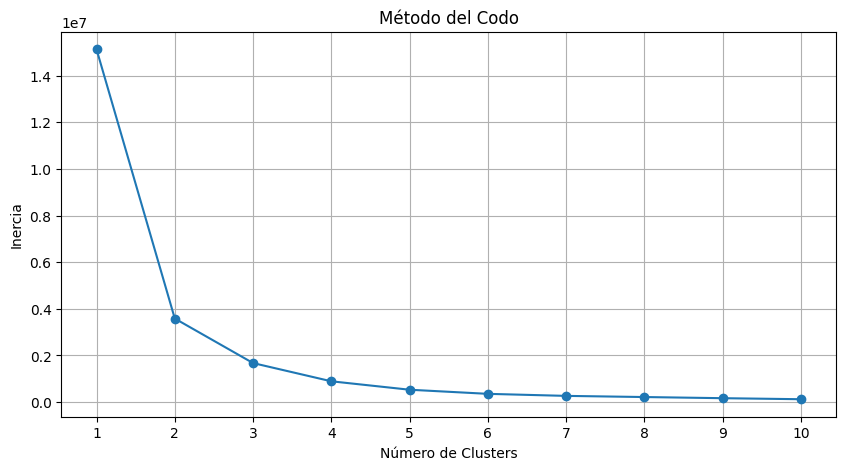

In [ ]:
# Aplicamos la técnica "inercia" y gráficamos para visualizar el Codo
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(variables_para_cluster)
    inertia.append(kmeans.inertia_)

# Creamos el gráfico de la técnica del Codo
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

###**🧩 Interpretación del Gráfico del Codo**

En gráfico podemos observar claramente la relación entre el número de clusters y la inercia mencionada anteriormente, que mide qué tan compactos están los grupos formados.

####🔍 Análisis visual:

**La curva desciende bruscamente de 1 a 2 clusters**, lo que indica una gran mejora en la agrupación al pasar a segmentar en dos grupos.

A partir del cluster 2, la disminución de la inercia se vuelve mucho más suave, lo que **sugiere que agregar más clusters no aporta una mejora significativa al análisis**.

####📌 Conclusión clave:

El punto de inflexión más pronunciado está en 2 clusters, por lo tanto, **la cantidad óptima de grupos es 2**.

Esto implica que **los clientes con alta probabilidad de fraude pueden dividirse en dos perfiles bien diferenciados**, lo cual facilitará el análisis posterior **para entender comportamientos y riesgos distintos entre ambos grupos**.

###✅ Esta decisión equilibra precisión y simplicidad, **permitiéndonos crear segmentaciones claras y eficientes**.

## 📊 **Paso 4: Agrupamos a los clientes usando la técnica de Clustering con KMeans**

Con base en el análisis del método del codo, **aplicaremos KMeans con 2 clusters** para agrupar a los clientes que presentan alta probabilidad de fraude.

####🔍 ¿Qué significa esto?

- El algoritmo identificó 2 patrones distintos dentro de los clientes de alto riesgo de fraude.

- **Cada cliente fue asignado a uno de estos grupos según sus comportamientos, o a los patrones que presentan**, como edad, monto del crédito, duración del préstamo, entre otras.



###✅ **Esta segmentación es el paso estratégico para detectar fraudes de forma más personalizada y proactiva**, fortaleciendo las capacidades del modelo más allá de la simple predicción.

In [ ]:
# Asignamos los 2 grupos
k_optimo = 2
kmeans = KMeans(n_clusters=k_optimo, random_state=99)
clusters = kmeans.fit_predict(variables_para_cluster)

# Añadimos el número de cluster al DataFrame original
casos_riesgosos["Cluster"] = clusters


In [ ]:
# Verificamos que se añadieron correctamente
casos_riesgosos.head()

,Unnamed: 0,Age,Sex,Job,Saving accounts,Checking account,Credit amount,Duration,Housing_free,Housing_own,...,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Probabilidad_Fraude,Cluster
460,460,0.321429,0,2,1,1,0.214718,0.470588,False,True,...,False,False,False,False,True,False,False,False,1,0
864,864,0.107143,0,1,1,0,0.124881,0.088235,False,False,...,False,False,False,False,True,False,False,False,1,1
753,753,0.107143,1,2,1,0,0.351768,0.382353,False,True,...,False,False,False,False,False,True,False,False,1,1
609,609,0.464286,0,2,0,0,0.066900,0.161765,True,False,...,False,True,False,False,False,False,False,False,1,1
155,155,0.017857,1,2,1,1,0.065753,0.117647,False,False,...,False,False,False,False,True,False,False,False,1,0


## 🧠 **Analizamos los patrones dominantes de cada segmento**

Después de aplicar el algoritmo de KMeans, exploraremos las características principales que definen a cada uno de los dos grupos identificados.

####🔍 ¿Qué observaremos?

**Cada segmento presentará comportamientos distintos en variables clave** como edad, monto solicitado, duración del crédito y nivel de ingresos.

Por ejemplo:

- Un grupo puede estar compuesto por clientes más jóvenes, con créditos de corto plazo y montos bajos, **lo cual podría indicar fraudes impulsivos o de bajo perfil**.

- El otro grupo puede incluir clientes de mayor edad, que solicitan montos elevados y plazos largos, **lo que podría asociarse a fraudes más planificados o sofisticados**.

📌 Esta diferenciación **se basa en patrones que emergen directamente de los datos**, lo que permite una comprensión más profunda y segmentada del fenómeno del fraude.

###✅ Con este análisis, **el banco puede diseñar estrategias específicas para cada tipo de riesgo**, mejorando la efectividad de sus medidas preventivas y de monitoreo.



In [ ]:
# Calculamos los promedios por cluster
resumen_clusters = casos_riesgosos.groupby('Cluster').mean()

# Mostramos los resultados
resumen_clusters.T.sort_values(by=0, ascending=False)


Cluster,0,1
Unnamed: 0,223.255556,724.489362
Job,1.866667,1.872340
Checking account,1.266667,1.031915
Saving accounts,1.222222,1.095745
Probabilidad_Fraude,1.000000,1.000000
Housing_own,0.788889,0.648936
Sex,0.322222,0.308511
Purpose_radio/TV,0.311111,0.223404
Age,0.271230,0.289134
Duration,0.254412,0.247184


##🧠 **Análisis Estratégico de Segmentación en Clientes con Alta Probabilidad de Fraude**

En base a los resultados de aplicar el análisis de clustering con KMeans, obtuvimos una interpretación clara de que los 2 grupos presentan comportamientos financieros y patrones de fraude claramente distintos.

También le permitimos al banco adoptar estrategias específicas de prevención según el tipo y magnitud del riesgo.

####🔸 Segmento 0 – **“Fraude de Bajo Monto con Apariencia Estable”**

Clientes con acceso a productos financieros con un historial aparentemente confiable, pero con riesgo de cometer fraudes pequeños y recurrentes, **difíciles de detectar a corto plazo**.

####🧾 **Principales características**:

- 🏠 Alta proporción de propietarios de vivienda (79%), **lo que transmite estabilidad y bajo riesgo a simple vista**.

- 💳 **Frecuente acceso y uso de productos bancarios tradicionales** como cuentas de ahorro y cheques activos.

- 📺 Uso recurrente del crédito **para bienes de consumo como electrodomésticos y muebles**.

- 💰 **Solicitudes con montos bajos y plazos cortos**.

####⚠️ Riesgo asociado:

Estos clientes podrían estar cometiendo fraudes de baja escala de forma repetida, ocultos tras un historial confiable.

**Las pérdidas acumuladas podrían ser significativas si no se detectan a tiempo**.


####✅ Recomendaciones para el Banco:

- **Estar atentos a clientes que repiten el mismo comportamiento muchas veces**:

 Si una persona pide varios préstamos pequeños o siempre para lo mismo como comprar electrodomésticos, puede estar usando su buen historial para hacer fraude poco a poco.

- **No dar tanto crédito automático solo porque el cliente tiene buen historial**:

 Aunque parezca confiable, es mejor ajustar los límites de crédito según cómo se comporta en realidad.

- **Revisar si cambian su forma de actuar**:

 Si de repente un cliente que siempre pedía poco ahora pide un préstamo para un negocio, **eso podría ser una señal de alerta**.

####🔹 Segmento 1 – **“Fraude de Alto Monto con Riesgo Operativo Elevado”**

Clientes con menor integración al sistema financiero, patrones variados y mayor propensión a fraudes de alto impacto en eventos poco comunes, difíciles de anticipar mediante reglas tradicionales.

####🧾 Principales características:

- 💸 **Solicitudes de crédito por montos más altos**, dirigidas a vehículos, educación o negocios.

- 🏚️ **Mayor proporción de inquilinos o personas sin vivienda estable** (35%).

- 👤 **Menor acceso o relación con productos financieros**.

- 🔀 Perfil menos estructurado, **con mayor variabilidad entre los individuos que se encuentran dentro**.

####⚠️ Riesgo asociado:

Este segmento puede estar vinculado a fraudes más elevados, y dados en ocasiones más puntuales, **lo que puede implicar pérdidas bastantes grandes si no se previenen a tiempo**.

####✅ Recomendaciones para el Banco:

- **Verificar con más cuidado los préstamos grandes o fuera de lo común**:

 Si alguien que no usa mucho el banco pide un préstamo alto, revisar bien sus datos antes de aprobar.

- **Crear reglas diferentes para estos casos especiales**:

 Usar herramientas como esta que detecten señales de alerta incluso si el cliente no ha hecho fraude antes, porque los fraudes aquí pueden ser grandes y rápidos.

- **Prepararse para lo peor**:

 Hacer pruebas internas como: **“¿Qué pasa si 10 clientes de este tipo hacen fraude al mismo tiempo?”**. Así se sabrá cómo actuar.

####🎯 Conclusión:

Con este análisis, **el banco puede tratar a cada tipo de cliente riesgoso de forma distinta**. Así puede:

- Evitar pérdidas pequeñas que se repiten muchas veces.

- Detectar a tiempo fraudes grandes y costosos.

- Usar mejor su equipo de auditoría, **enfocándose donde realmente importa**.



## **📈 Visualización de los Grupos de Clientes con Riesgo de Fraude**

Para entender mejor los dos tipos de clientes con alta probabilidad de fraude que identificamos, **creamos un gráfico que los representa visualmente**.

####🔍 ¿Qué vemos en este gráfico?

- Cada punto es un cliente y **cada color representa uno de los dos grupos diferentes que detectamos**.

- **La posición de cada cliente en el gráfico depende de cómo se parecen entre ellos** en aspectos como el monto del crédito, la edad, la duración, etc.

####🧠 ¿Para qué sirve este gráfico?

- Nos permite ver claramente los dos tipos distintos de clientes riesgosos.

- **Ayuda a identificar qué tan separados o parecidos son entre sí** estos dos grupos.

- **Facilita explicar los resultados a otras áreas del banco**, como el equipo de seguridad, atención al cliente o directivos.

####✅ ¿Qué nos aporta esto para tomar decisiones?

###**Esta visualización es un apoyo y un respaldo para poder interpretar mejor los resultados de una manera más proactiva**.


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127760 (\N{GLOBE WITH MERIDIANS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


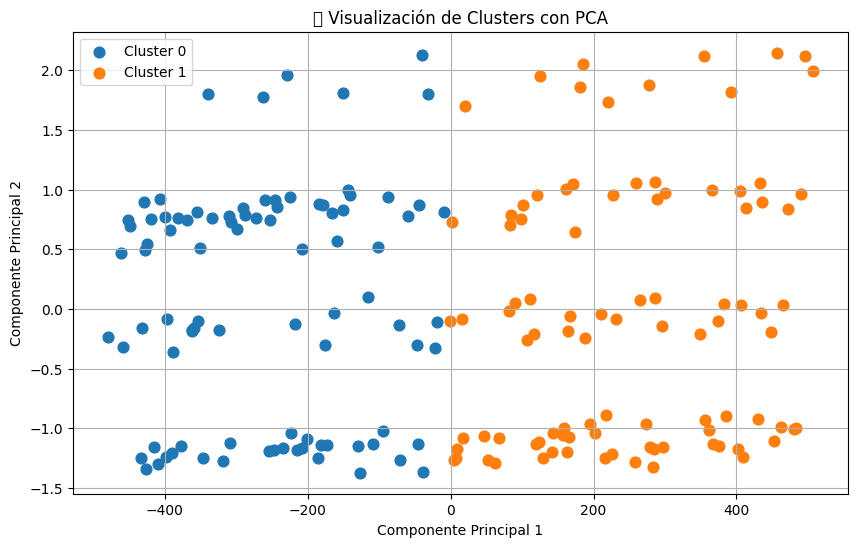

In [ ]:
# Asignar etiquetas a cada registro
etiquetas_clusters = kmeans.labels_

# Aplicamos PCA para reducir a 2 componentes principales
pca = PCA(n_components=2, random_state=42)
componentes_pca = pca.fit_transform(variables_para_cluster)

# Creamos un DataFrame para visualizar mejor
df_clusters = pd.DataFrame(componentes_pca, columns=['Componente 1', 'Componente 2'])
df_clusters['Cluster'] = etiquetas_clusters  # etiquetas de KMeans

# Visualizamos los clusters
plt.figure(figsize=(10, 6))
for c in df_clusters['Cluster'].unique():
    subset = df_clusters[df_clusters['Cluster'] == c]
    plt.scatter(subset['Componente 1'], subset['Componente 2'], label=f'Cluster {c}', s=60)

plt.title('🌐 Visualización de Clusters con PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.grid(True)
plt.show()


###📌 **¿Qué nos muestra el gráfico?**


🔵 **Los puntos azules representan al Cluster 0**: “Fraude de Bajo Monto con Apariencia Estable”

🟠 **Los puntos naranjas representan Cluster 1**: “Fraude de Alto Monto con Riesgo Operativo Elevado”

####🧠 ¿Por qué es importante esta visualización?

**Este gráfico confirma y respalda lo que descubrimos antes con el análisis de datos**:

- **Existen dos tipos claros de perfiles de alto riesgo** dentro de los clientes potencialmente fraudulentos.

- **Los grupos están bien separados visualmente, lo que indica que tienen diferencias marcadas en sus características** como el monto del crédito, el tipo de vivienda, el propósito del préstamo, entre otros.

####✅ ¿Qué valor aporta para la toma de decisiones?

Permite visualizar con claridad los resultados, **no solo con números si no también gráficamente**.

Ayuda a crear estrategias con confianza, ya sea para vigilancia, prevención o incluso para intervenciones personalizadas, **pero ahora sabiendo que los resultados están respaldados**.

### **Refuerza la utilidad del modelo como herramienta de detección más inteligente y confiable**.



#✅ **Conclusión Final del Modelo Creado**

Este proyecto representa mucho más que una solución técnica: **es una herramienta estratégica diseñada para maximizar el valor del negocio** mediante Inteligencia Artificial aplicada con criterio empresarial.

💡 A través del uso de TPOT (AutoML), automatizamos la selección del mejor modelo para detectar fraudes crediticios en este caso específico, priorizando no solo su precisión estadística, sino **también su rentabilidad real**.

**Ajustamos el umbral de decisión en función de los costos y beneficios** específicos del banco, **alineando cada predicción con el impacto financiero que representa**.

####📈 Los resultados fueron contundentes:

- 🎯 Tasa de detección de fraude antes del modelo: **30%**

- 🚀 Tasa de detección del modelo ajustado: **92%**

- 💸 Utilidad sin aplicar el modelo: **–$466,000**

- ✅ Utilidad al aplicar el modelo optimizado: **+$54,400**

📊 Además, aplicamos técnicas de segmentación o Clustering, sobre los clientes con mayor riesgo, descubriendo dos perfiles de comportamiento fraudulentos claramente diferenciados.

**Esta información aporta valor directo al permitir diseñar acciones específicas**, más efectivas y focalizadas en cada tipo de amenaza.

🧠 Como **Científico de Datos**, diseñé este modelo con una visión integral: **conectar la analítica avanzada con la lógica del negocio**.

No se trató únicamente de construir un modelo preciso, sino de **crear una herramienta alineada con los objetivos financieros** y operativos de la organización.

🌍 Cabe destacar que esta solución no es exclusiva de un único banco.

Su enfoque modular y adaptable permite replicarla en otras instituciones del sector financiero, maximizando su escalabilidad y potencial de impacto.

###🚀 En definitiva, este Modelo demuestra cómo la Ciencia de Datos, bien aplicada, puede convertirse en un socio estratégico del negocio: **ayudando a proteger el capital, optimizar recursos, y tomar decisiones más inteligentes y rentables**.

